# 과제 7 & 8: 그래프 알고리즘
---
박정현(pwjdgus1017@donga.ac.kr), 배정훈(rhenus9911@gmail.com), 최재혁(fkdlfkdl68@donga.ac.kr), 권건우(a71463092@gmail.com)
---
우리는 그래프에 대한 이론을 학습하였다. 특히, 우리는 다양한 그래프에 대한 종류(Complete graph, isomorphism graph, homomorphism graph, spanning graph, euler graph, hamilton graph 등을 학삽하였다. 또한 그에 관련된 알고리즘으로써, 우리는 그래프 종류에 대한 평가 방법(각 그래프 종류 판별법) 및 관련된 알고리즘(판매원 탐방, 최단 경로, 그래프 컬러링 등)를 학습하였다. 이를 기반으로, 아래의 주어진 문제 7, 8 에 대한 코드를 작성하시오.




# 해당파일 활용 방법- [메뉴] 파일->드라이브에 사본 저장을 통해서 프로그램 실행하시면 됩니다.

# 문제 7: 여러가지 그래프 판별법
Isomorphism graph, Sparse and Dense graphs, Euler and Hamiltonian graph를 인지를 확인하는 코드를 작성하시오.


In [136]:
import networkx as nx

## 문제 7-1: Isomorphism
주어진 두 Directed 그래프 (G1, G2) 로부터 Isomorphism graph 인지를 판별하기

In [137]:
def is_isomorphic(G1, G2):
  '''
  G1과 G2가 isomorphic 관계인지를 체크
  :param G1: Directed 그래프
  :param G2: Directed 그래프
  :return: Boolean
  '''

  if G1.number_of_nodes() != G2.number_of_nodes():
    return False
  if G1.number_of_edges() != G2.number_of_edges():
    return False
# 우선 노드와 엣지수가 같아야 한다
  #G1의 (in, out) 차수 리스트 생성
  g1_degrees = []
  for n in G1.nodes():
    g1_degrees.append( (G1.in_degree(n), G1.out_degree(n)) )

  # G2의 (in, out) 차수 리스트 생성
  g2_degrees = []
  for n in G2.nodes():
    g2_degrees.append( (G2.in_degree(n), G2.out_degree(n)) )


  return sorted(g1_degrees) == sorted(g2_degrees)

In [138]:
g1 = nx.DiGraph()
g2 = nx.DiGraph()
nx.add_path(g1, [1,2,3,4,5,6,7,8,9,10])
nx.add_path(g2, [10,20,30,40,50,60,70,80,90,100])
print(is_isomorphic(g1,g2)) # nx.is_isomorphic 사용하지 말 것

True


## 문제 7-2: Graph Density
다음 그래프에 대해서 Graph Density를 계산하는 구하는 함수 def calculate_density()를 작성하여라. 또한

In [139]:
def calculate_density(G):
  '''
  :param G: directed 그래프
  :return: graph density의 값 [0,1]
  밀도 = m / (n * (n-1))

  n = 노드(Vertex)의 총 개수

  m = 엣지(Edge)의 총 개수
  '''

  n = G.number_of_nodes()
  m = G.number_of_edges()

  # 노드가 1개 이하면 (n * (n-1)이 0이 됨) 밀도는 0
  if n <= 1:
    return 0.0

  # 최대 가능한 엣지의 수 (방향 그래프)
  max_possible_edges = n * (n - 1)

  # 밀도 계산
  density = m / max_possible_edges

  return density

0.20408163265306123


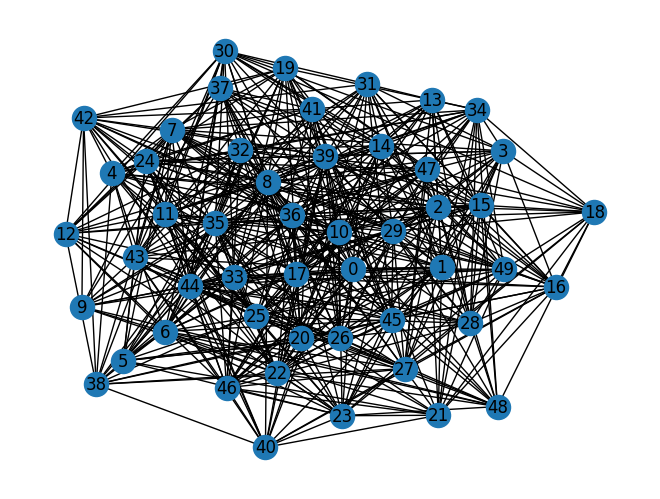

In [140]:
g = nx.watts_strogatz_graph(50, 20, 1)#(n,k,p)n:노드 수 k:초기 이웃 수 p:재연결 확률
print(calculate_density(g)) # nx.density 사용하지 말 것
nx.draw(g, with_labels=True)

## 문제 7-3: Euler graph
다음 주어진 그래프가 Euler graph 인지를 확인하는 코드를 작성하시오

In [141]:
def is_Eulerian(g):
  '''
  :param g: undirected graph
  :return: Boolean
  '''

  if not nx.is_connected(g):
    return False
  #그래프에 연결된 모든 점의 차수가 짝수여야 합니다.
  for n in g.nodes():
    if g.degree(n) % 2 != 0:
      return False

  return True

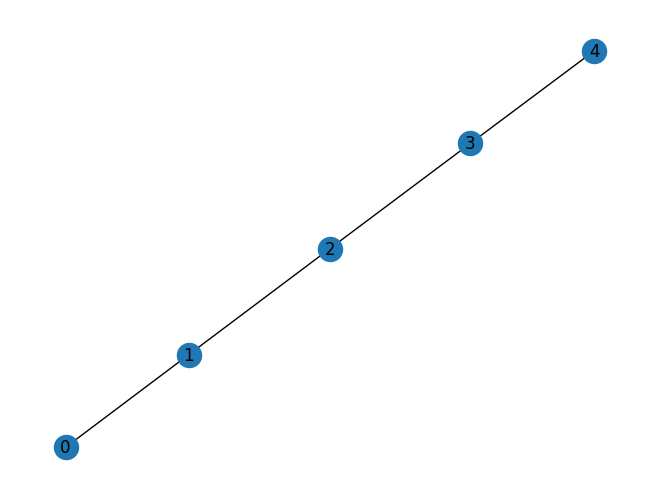

In [142]:
g = nx.path_graph(5)
nx.draw(g, with_labels=True)

In [143]:
is_Eulerian(g) # nx.is_Eulerian 사용하지 말 것

False

# 문제 7-4: Hamilton Graph

다음 graph1, graph2, graph3이 hamilton graph 인지를 판별하는 프로그램을 구현하라

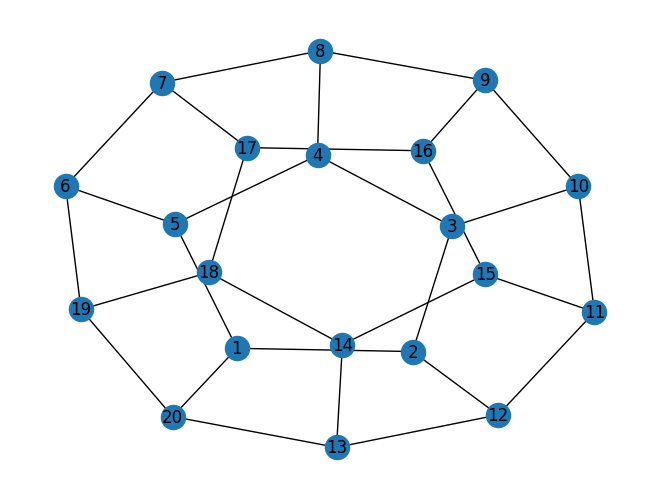

In [144]:
# q1
g = nx.Graph()

g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_edge(5,1)
g.add_edge(1,20)
g.add_edge(2,12)
g.add_edge(3,10)
g.add_edge(4,8)
g.add_edge(5,6)
g.add_edge(12,13)
g.add_edge(13,20)
g.add_edge(20,19)
g.add_edge(19,6)
g.add_edge(6,7)
g.add_edge(7,8)
g.add_edge(8,9)
g.add_edge(9,10)
g.add_edge(10,11)
g.add_edge(11,12)
g.add_edge(13,14)
g.add_edge(18,19)
g.add_edge(17,7)
g.add_edge(9,16)
g.add_edge(11,15)
g.add_edge(14,15)
g.add_edge(15,16)
g.add_edge(16,17)
g.add_edge(17,18)
g.add_edge(18,14)

nx.draw(g, with_labels=True)

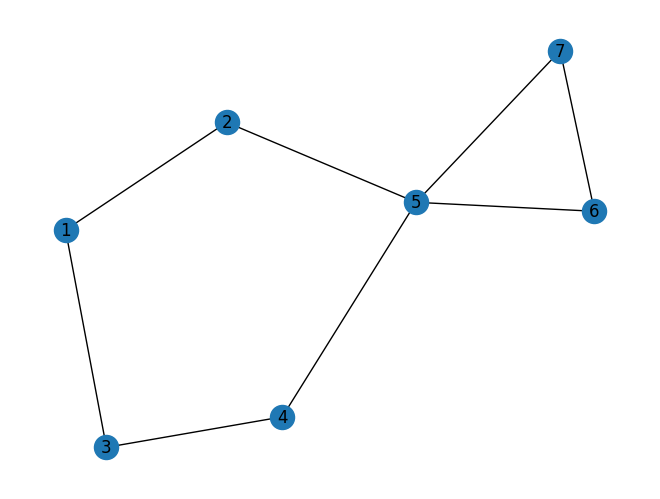

In [145]:
# q2
g1 = nx.Graph()
g1.add_edge(1,2)
g1.add_edge(2,5)
g1.add_edge(5,4)
g1.add_edge(4,3)
g1.add_edge(1,3)
g1.add_edge(5,7)
g1.add_edge(7,6)
g1.add_edge(5,6)
nx.draw(g1, with_labels=True)

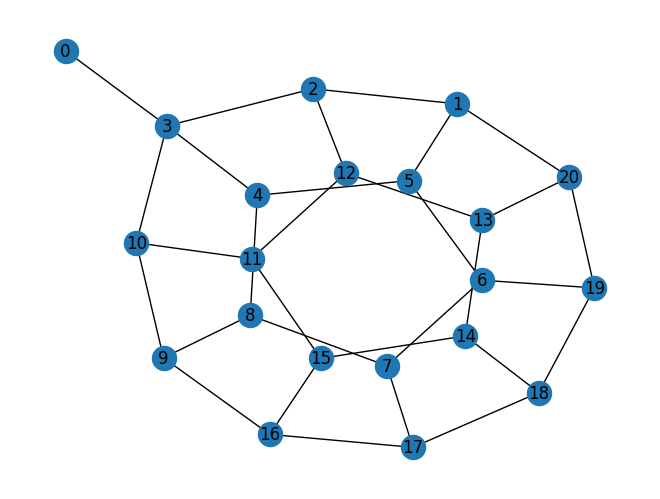

In [146]:
#q3
g2 = nx.Graph()

g2.add_edge(3,0)
g2.add_edge(1,2)
g2.add_edge(2,3)
g2.add_edge(3,4)
g2.add_edge(4,5)
g2.add_edge(5,1)
g2.add_edge(1,20)
g2.add_edge(2,12)
g2.add_edge(3,10)
g2.add_edge(4,8)
g2.add_edge(5,6)
g2.add_edge(12,13)
g2.add_edge(13,20)
g2.add_edge(20,19)
g2.add_edge(19,6)
g2.add_edge(6,7)
g2.add_edge(7,8)
g2.add_edge(8,9)
g2.add_edge(9,10)
g2.add_edge(10,11)
g2.add_edge(11,12)
g2.add_edge(13,14)
g2.add_edge(18,19)
g2.add_edge(17,7)
g2.add_edge(9,16)
g2.add_edge(11,15)
g2.add_edge(14,15)
g2.add_edge(15,16)
g2.add_edge(16,17)
g2.add_edge(17,18)
g2.add_edge(18,14)

nx.draw(g2, with_labels=True)

In [147]:
def hamilton_graph(g, source):
  '''
  prompt
  문제 7-4: Hamilton Graph
  먼저, 해밀턴 그래프가 무엇인지 간단히 설명해줘. (오일러 그래프와 비교)
  그런 다음, 아래에 제공되는 3개의 그래프 정의(g, g1, g2)와 3개의 함수를 가지고, 각 그래프가 해밀턴 그래프인지 판별하는 전체 코드를 완성해줘.
  g : (무방향) graph
  source : start node
  '''
  n = g.number_of_nodes()

  # 노드가 2개 이하면 회로 성립 불가
  if n <= 2:
    print("is NOT a hamilton graph")
    return

  # 전체 엣지 리스트
  all_edges = list(g.edges())

  # 'source'에서 출발하는 엣지 리스트
  start_edges = get_edges(source, all_edges)

  # 방문한 노드 리스트 (시작 노드를 포함하여 초기화)
  visited_nodes = [source]

  # 백트래킹 시작
  if do_backtrack(g, start_edges, source, source, None, all_edges, visited_nodes):
    print("is regarded as hamilton graph")
  else:
    print("is NOT a hamilton graph")

def get_edges(source, li):
  '''
  source : node
  li : (무방향) graph의 edges
  '''
  # 무방향 그래프이므로, source가 엣지의 0번이든 1번이든
  # 'source'에 연결된 엣지를 모두 찾습니다.
  edges_from_source = []
  for edge in li:
    if edge[0] == source:
      edges_from_source.append(edge)
    elif edge[1] == source:
      edges_from_source.append(edge)
  return edges_from_source

def do_backtrack(g, edges_list, source, first_Node, lately_node, li, visited_Node):
  '''
  g : (무방향) graph
  edges_list : source를 기준으로 출발하는 edges
  source : 현재 node
  first_Node : Hamilton Graph의 시작점
  lately_node : source 이전에 방문했던 Node (이 함수에서는 사용 안 함)
  li : (무방향) graph의 edges
  visited_Node : 방문 한 노드
  '''

  # 'source'에 연결된 모든 엣지를 탐색
  for edge in edges_list:
    # 엣지 (A, B)에서 'source'가 A라면 B, 'source'가 B라면 A를 찾음
    next_node = edge[1] if edge[0] == source else edge[0]

    # 다음 노드가 '시작점'인 경우 (사이클 완성)
    if next_node == first_Node:
      # 모든 노드를 방문했는지 체크
      if len(visited_Node) == g.number_of_nodes():
        # 해밀턴 회로 발견!
        return True
      else:
        # (모든 노드를 방문하지 않았으므로 해밀턴 회로가 아님)
        continue

    # 다음 노드가 아직 '방문하지 않은' 노드인 경우
    if next_node not in visited_Node:

      # 1. 경로에 추가 (방문)
      visited_Node.append(next_node)

      # 2. '다음 노드'에서 출발하는 엣지 목록을 가져옴
      next_edges_list = get_edges(next_node, li)

      # 3. 재귀 호출 (백트래킹)
      if do_backtrack(g, next_edges_list, next_node, first_Node, source, li, visited_Node):
        return True

      # 4. 백트래킹: (3번이 False를 반환) 막다른 길이므로 방문 목록에서 제거
      visited_Node.pop()

  # 'source'에서 출발하는 모든 엣지를 탐색했으나 경로를 찾지 못함
  return False

In [148]:
print("g :", end = " ")
hamilton_graph(g,1)
# g is regarded as hamilton graph
print("g1 :", end = " ")
hamilton_graph(g1,1)
print("g2 :", end = " ")
hamilton_graph(g2,1)

g : is regarded as hamilton graph
g1 : is NOT a hamilton graph
g2 : is NOT a hamilton graph


# 문제 8: 그래프 알고리즘 사용하기

그래프 알고리즘이 주로 사용되는 예는 항공운항정보의 네트워크를 구성할때 사용한다. 그래프 모델에서, 항공사(airlines)혹은 공항(airports)는 노드(Nodes/Vertices)로 구성되고 각 공항간의 운항 정보는 관계(Relationships/Edges)로 표현된다.

## 항공운항정보 데이터 셋업

In [149]:
import pandas as pd

In [150]:
# 공항 정보, 항공사, 운항정보를 불러오기를 수행한다
airports = pd.read_csv("/content/drive/MyDrive/airports.csv", header=None)

In [151]:
usa_airports = airports[airports.iloc[:, 3] == 'United States'] # 미국 내 공항만 추출

In [152]:
usa_airports = usa_airports.loc[:,[1,4,6,7]]
usa_airports.rename(columns={1: 'name', 4: 'id', 6: 'latitude', 7: 'longitude'}, inplace=True)
usa_airports
# column_names=['name','id','latitude','longitude']

,name,id,latitude,longitude
3200,Barter Island LRRS Airport,BTI,70.134003,-143.582001
3201,Cape Lisburne LRRS Airport,LUR,68.875099,-166.110001
3202,Point Lay LRRS Airport,PIZ,69.732903,-163.005005
3203,Hilo International Airport,ITO,19.721399,-155.048004
3204,Orlando Executive Airport,ORL,28.545500,-81.332901
...,...,...,...,...
6996,Cape Canaveral AFS Skid Strip,XMR,28.467600,-80.566597
6997,Homey (Area 51) Airport,\N,37.235001,-115.810997
6998,Zanesville Municipal Airport,ZZV,39.944401,-81.892097
7048,Nenana Municipal Airport,ENN,64.547302,-149.074005


In [153]:
trips = pd.read_csv("/content/drive/MyDrive/188591317_T_ONTIME.csv.gz", low_memory=False)

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
trips.rename(columns={"ORIGIN":"src", "DEST":"dst", "DEP_DELAY":"deptDelay", "ARR_DELAY":"arrDelay","TAIL_NUM":"tailNumber","FL_NUM":"flightNumber","FL_DATE":"date", "CRS_DEP_TIME":"time","CRS_ARR_TIME":"arrivalTime","DISTANCE":"distance","UNIQUE_CARRIER":"airline"}, inplace=True)

In [156]:
G = nx.from_pandas_edgelist(trips, source="src", target="dst", edge_attr=['distance'])

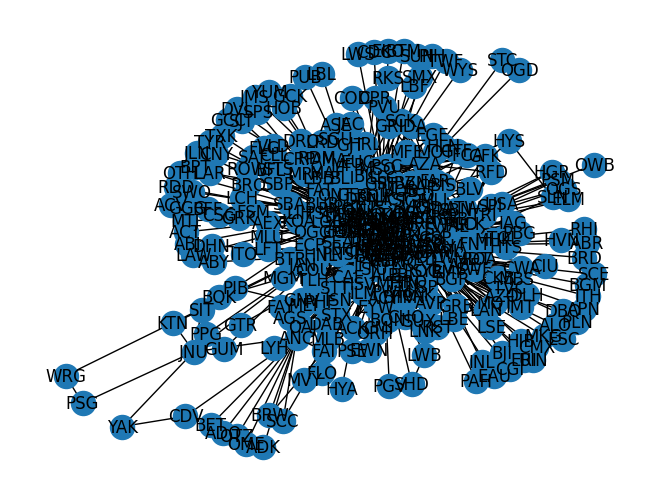

In [157]:
nx.draw(G, with_labels=True)

In [158]:
trips

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,date,airline,AIRLINE_ID,CARRIER,tailNumber,...,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 109
0,2018,2,5,1,2,2018-05-01,DL,19790,DL,N6709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,2,5,1,2,2018-05-01,DL,19790,DL,N820DN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,2,5,1,2,2018-05-01,DL,19790,DL,N856DN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,2,5,1,2,2018-05-01,DL,19790,DL,N329NB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,2,5,1,2,2018-05-01,DL,19790,DL,N697DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616524,2018,2,5,17,4,2018-05-17,UA,19977,UA,N76502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616525,2018,2,5,17,4,2018-05-17,UA,19977,UA,N73860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616526,2018,2,5,17,4,2018-05-17,UA,19977,UA,N48127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616527,2018,2,5,17,4,2018-05-17,UA,19977,UA,N822UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


미국 공항 개수, 항로의 수

In [159]:
G.number_of_nodes()

341

In [160]:
G.number_of_edges()

2677

## 최단거리 알고리즘
최단거리 알고리즘은 다양한 방법들이 존재한다. 학습한 Dijkstra 이외에도, A*, Bellman-Ford, Floyd-Warshall, Yen's 등 다양한 알고리즘이 존재한다.
https://networkx.org/documentation/stable//reference/algorithms/shortest_paths.html#
참고하여 다음 문제를 해결하시오

## 문제 8-1: 최단거리 문제
샌프란시스코 국제 공항(San Francisco International Airport)과 뉴욕의 존 F 케네디 국제 공항(John F Kennedy International Airport)사이에 직항(non-stop flight)이 있는지 찾으시오.
힌트: 공항 코드를 사용하여, 두 공항 사이에 최단거리 경로 내 경유 공항이 있는지를 확인

출력의 결과는 참고용입니다.

In [161]:
# 샌프란시스코 국제 공항을 찾는 예제
src = usa_airports[usa_airports.name.str.contains('San Francisco International Airport')]
# 존 F 케네디 국제 공황을 찾는 예제
dst = usa_airports[usa_airports.name.str.contains('John F Kennedy International Airport')]
# 공항코드 검색
# your code here
src_code = src['id'].iloc[0]
dst_code = dst['id'].iloc[0]


In [162]:
def has_nonstop_flight(graph, source_code, dest_code):
  '''
  두 공항 사이에 non-stop flight가 있는지 체크하는 함수
  :param graph: trips 그래프
  :param src: 출발 공항
  :param dst: 목적 공항
  :return: Boolean
  '''
  try:
    # 1. 최단 거리 계산
    length = nx.shortest_path_length(graph, source=source_code, target=dest_code)

    # 2. 거리가 1이면 직항
    return length == 1

  except (nx.NetworkXNoPath, nx.NodeNotFound):
    # 경로가 없거나 노드가 G에 없는 경우
    return False

In [163]:
has_nonstop_flight(G, src, dst)

False

## 문제 8-2: 주어진 공항들을 순서대로 경유하는 경로의 최단 거리(distance)를 계산하는 함수를 작성하시오

다음 4개의 공항을 순서대로 경유하면 된다.(출발 시간은 고려하지 않는다)
Los Angeles International Airport -> Hartsfield Jackson Atlanta International Airport -> Miami International Airport -> Washington Dulles International Airport


In [164]:
def shortest_path_length_from_airports(graph, airport_seq):
  '''
  주어진 공항의 시퀀스(sequence)로부터 최단경로의 거리를 계산하시오
  :param graph: trips 그래프 (G)
  :param airport_seq: 공항 '코드' 리스트 (예: ['LAX', 'ATL', ...])
  :return: 총 거리(distance) 값(float형)
  '''
  total_distance = 0.0

  if not airport_seq or len(airport_seq) < 2:
    return 0.0

  try:
    # 3. 리스트를 2개씩 짝지어(src, dst) 순회합니다.
    for i in range(len(airport_seq) - 1):
      src = airport_seq[i]
      dst = airport_seq[i+1]

      # 4. 'distance'를 가중치(weight)로 하여 최단 경로 거리를 계산
      # (셋업된 'G' 그래프를 사용합니다)
      distance = nx.shortest_path_length(graph, source=src, target=dst, weight='distance')

      # 5. 총 거리에 더합니다.
      total_distance += distance

  except nx.NetworkXNoPath:
    # 두 공항 사이에 경로가 존재하지 않는 경우
    print(f"오류: {src}에서 {dst}로 가는 경로가 존재하지 않습니다.")
    return 0.0 # 또는 None
  except (nx.NodeNotFound, KeyError):
    # 공항 코드가 그래프에 없는 경우
    print(f"오류: {src} 또는 {dst} 공항이 그래프에 없습니다.")
    return 0.0 # 또는 None

  return total_distance

In [165]:
airport_names = [
    'Los Angeles International Airport',
    'Hartsfield Jackson Atlanta International Airport',
    'Miami International Airport',
    'Washington Dulles International Airport'
]
seq = []
for name in airport_names:
  code = usa_airports[usa_airports.name.str.contains(name)]['id'].iloc[0]
  seq.append(code)
shortest_path_length_from_airports(G, seq)

3461.0

## 문제 8-3: 단일 출발지 최단거리 찾기 (Single source shortest path)
Los Angeles International Airport 국제 공항에서 직항(Non-stop)으로 이동할수 있는 공항 중에서 가장 가까운 공항과 가장 먼 공항을 반환하는 함수를 작성하시오

In [166]:
def get_farthest_or_shortest_airports_from(graph, src):
  '''
  가장 멀거나 가까운 '직항' 공항을 찾습니다.
  :param graph: trips 그래프
  :param src: 출발지 공항 정보 (DataFrame 행)
  :return: ( farthest airport code, shortest airport code ) (tuple 형으로 반환)
  '''

  # 1. DataFrame에서 공항 코드를 추출
  src_code = src['id'].iloc[0]

  farthest_airport = None
  shortest_airport = None
  max_distance = 0.0
  min_distance = float('inf') # 최소값을 찾기 위해 무한대로 초기화

  # 2. 'src_code'의 모든 '직항' 이웃(neighbors)을 순회
  for neighbor in graph.neighbors(src_code):

    # 3. 'src'와 'neighbor' 사이의 엣지(직항) 정보를 가져옴
    edge_data = graph.get_edge_data(src_code, neighbor)

    # 4. 엣지의 'distance' 속성을 가져옴
    distance = edge_data['distance']

    # 5. 가장 먼 공항(max)인지 확인
    if distance > max_distance:
      max_distance = distance
      farthest_airport = neighbor

    # 6. 가장 가까운 공항(min)인지 확인
    if distance < min_distance:
      min_distance = distance
      shortest_airport = neighbor

  return (farthest_airport, shortest_airport)

In [167]:
get_farthest_or_shortest_airports_from(G, src)

('BOS', 'STS')

## 문제 8-4: 출발을 제일 많이 하는 공항은?
주어진 trips 그래프로부터 제일 많은 수의 출발지(src)를 가진 공항이 어디인지 탐색하시오.

In [168]:
def get_airport_with_highest_departures(trips_df):
  '''
  G 대신 원본 trips DataFrame을 사용하여
  가장 많은 출발(src)을 가진 공항을 반환
  :param trips_df: trips DataFrame
  :return: ( airport code )
  '''

  ,
  return trips_df['src'].value_counts().idxmax()

# G 대신 'trips'를 인수로 전달하여 실행
get_airport_with_highest_departures(trips)

'ATL'

In [169]:
get_airport_with_highest_out_degree(G)

0

## Floyd Washall 알고리즘 활용
Floyd Washall 알고리즘은 모든 쌍의 경로의 가중치를 계산하는 데 사용된다. 다음 예제를 사용하여 우리는 LAX 코드를 가진 공항에서 출발하는 모든 공항에 대한 최단경로의 거리값을 계산할 수 있다.
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.dense.floyd_warshall.html#networkx.algorithms.shortest_paths.dense.floyd_warshall

In [170]:
all_pairs_shortest_path = nx.floyd_warshall(G, weight='distance')

In [171]:
# 예시 floyd_warshall
for k, dists in all_pairs_shortest_path.items():
  if k == 'LAX':
    print(dists)

defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7d58c6360900>, {'LAX': 0, 'ATL': 1946.0, 'SLC': 590.0, 'LAS': 236.0, 'DTW': 1978.0, 'MSP': 1535.0, 'SAN': 109.0, 'DFW': 1235.0, 'ANC': 2345.0, 'SEA': 954.0, 'PHL': 2401.0, 'JFK': 2475.0, 'MCO': 2218.0, 'AUS': 1242.0, 'MIA': 2342.0, 'OAK': 337.0, 'IAH': 1379.0, 'RNO': 391.0, 'CVG': 1900.0, 'BOS': 2610.0, 'SFO': 337.0, 'PDX': 834.0, 'BNA': 1797.0, 'MSY': 1670.0, 'HNL': 2556.0, 'TPA': 2158.0, 'MCI': 1363.0, 'DEN': 862.0, 'IND': 1814.0, 'RDU': 2239.0, 'OGG': 2486.0, 'KOA': 2504.0, 'CMH': 1995.0, 'LIH': 2615.0, 'DCA': 2311.0, 'MEM': 1619.0, 'SJC': 308.0, 'MFR': 630.0, 'BLI': 1047.0, 'SGF': 1423.0, 'TUL': 1283.0, 'EUG': 748.0, 'BOI': 674.0, 'PVU': 569.0, 'MSO': 923.0, 'EWR': 2454.0, 'ORD': 1744.0, 'IAD': 2288.0, 'CLE': 2052.0, 'ITO': 2449.0, 'BWI': 2329.0, 'SDF': 1843.0, 'FLL': 2342.0, 'DAL': 1246.0, 'ABQ': 677.0, 'ELP': 715.0, 'HOU': 1390.0, 'MDW': 1750.0, 'MKE': 1756.0, 'PHX': 370.0, 'PIT

## 문제 8-5: 1시간 내 도착지 계산 (Floyd Washall 알고리즘의 활용)
비행기의 속도가 500 km/h 라고 가정할 때 2시간내로 도착하는 공항 코드를 반환하는 함수를 작성하시오

In [172]:
def get_airports_within_2hours(G, speed):
  '''
  2시간 내(1000km 이내)에 도착 가능한 공항 코드를 반환합니다.
  (Floyd-Warshall 알고리즘 활용)
  :param G: trips 그래프
  :param speed: 비행기의 속도 km/h
  :return: 공항 코드 (list 형)
  '''

  # 1. 2시간 동안 이동할 수 있는 최대 거리
  max_distance = speed * 2 # 500 * 2 = 1000 km

  # 2. (문제 의도) G의 모든 공항 쌍 간의 최단 '비행 거리' 계산
  #    결과는 딕셔너리의 딕셔너리 형태 (예: {src: {dst1: dist, dst2: dist...}})
  all_pairs_shortest_path = nx.floyd_warshall(G, weight='distance')

  # 3. 1000km 이내에 도착 가능한 공항을 중복 없이 저장 (Set 사용)
  reachable_airports = set()

  # 4. 모든 출발지(source)를 순회
  for source, destinations in all_pairs_shortest_path.items():
    # 5. 모든 도착지(destination)를 순회
    for destination, distance in destinations.items():

      # 6. 거리가 0보다 크고(자기 자신 제외) 1000km 이내인 경우
      if 0 < distance <= max_distance:
        # 7. 도착 공항을 set에 추가
        reachable_airports.add(destination)

  return list(reachable_airports)

In [173]:
flight_speed = 500 # km/h
get_airports_within_2hours(G, flight_speed)

['OAK',
 'CAE',
 'CHA',
 'CIU',
 'CPR',
 'ASE',
 'TPA',
 'ACV',
 'LNK',
 'CKB',
 'LIT',
 'ITH',
 'EGE',
 'LAN',
 'MCO',
 'ATL',
 'SUN',
 'MQT',
 'DLH',
 'DTW',
 'CMI',
 'BNA',
 'STL',
 'ACT',
 'BIL',
 'LYH',
 'DCA',
 'EKO',
 'PHX',
 'GRB',
 'UIN',
 'PIE',
 'ERI',
 'ELP',
 'STX',
 'ADQ',
 'AZO',
 'GNV',
 'XNA',
 'ELM',
 'ALO',
 'PIT',
 'SEA',
 'MVY',
 'ICT',
 'RKS',
 'PVD',
 'TXK',
 'OMA',
 'COD',
 'OKC',
 'EUG',
 'HYA',
 'JLN',
 'MGM',
 'CLE',
 'EVV',
 'FLO',
 'FAT',
 'OTH',
 'PBI',
 'INL',
 'HSV',
 'MLU',
 'DAL',
 'CID',
 'ILM',
 'SAN',
 'TUS',
 'JAX',
 'HOB',
 'RHI',
 'FWA',
 'GGG',
 'PDX',
 'SBN',
 'ALB',
 'HRL',
 'SRQ',
 'GPT',
 'SJT',
 'OAJ',
 'JFK',
 'TRI',
 'MKE',
 'MDW',
 'ABY',
 'OTZ',
 'LAX',
 'COS',
 'LGA',
 'RAP',
 'MYR',
 'PSC',
 'EAU',
 'EWR',
 'ROW',
 'BPT',
 'LEX',
 'HYS',
 'LCK',
 'ORF',
 'RNO',
 'HPN',
 'RIC',
 'MCI',
 'LBE',
 'DHN',
 'RDU',
 'FLG',
 'PLN',
 'CLT',
 'ISP',
 'PSP',
 'HVN',
 'CVG',
 'MSN',
 'LSE',
 'BHM',
 'CSG',
 'BOI',
 'DBQ',
 'PIA',
 'SLC',
 'EYW',


완료한 숙제는 ipynb 파일형식으로 다운로드 받아서, 가상대학 내 [과제 7,8에 업로드하시기 바랍니다.

# 감사합니다.